
# Project: Prediction of users' engagement using advertising data set.

Create a model that will predict whether or not customer will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [52]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [53]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [11]:
ad_data.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgener

In [12]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Use seaborn to explore the data.

** Create a histogram of the Age**

<AxesSubplot:>

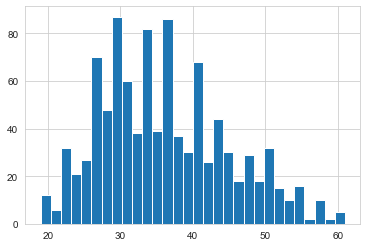

In [17]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins = 30)

**Create a jointplot showing Area Income versus Age.**

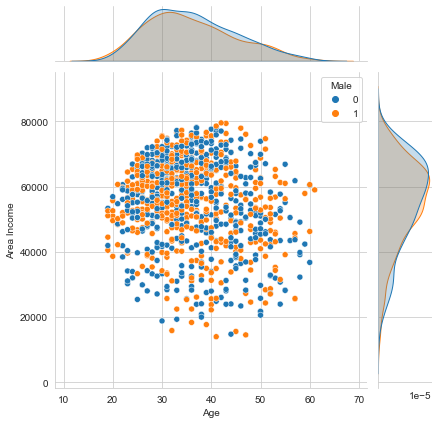

In [34]:
sns.jointplot(x = 'Age', y = 'Area Income', hue = 'Male', data = ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

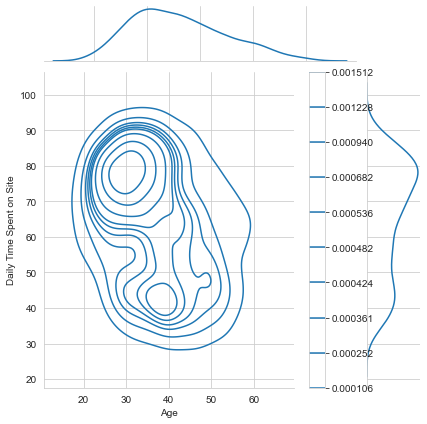

In [28]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', kind = 'kde', legend=True, cbar=True, data = ad_data)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

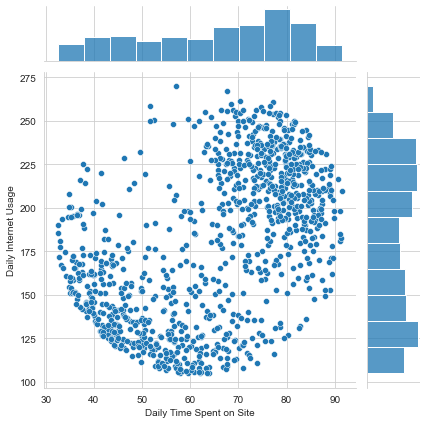

In [29]:
sns.jointplot(x ='Daily Time Spent on Site', y ='Daily Internet Usage', data = ad_data)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

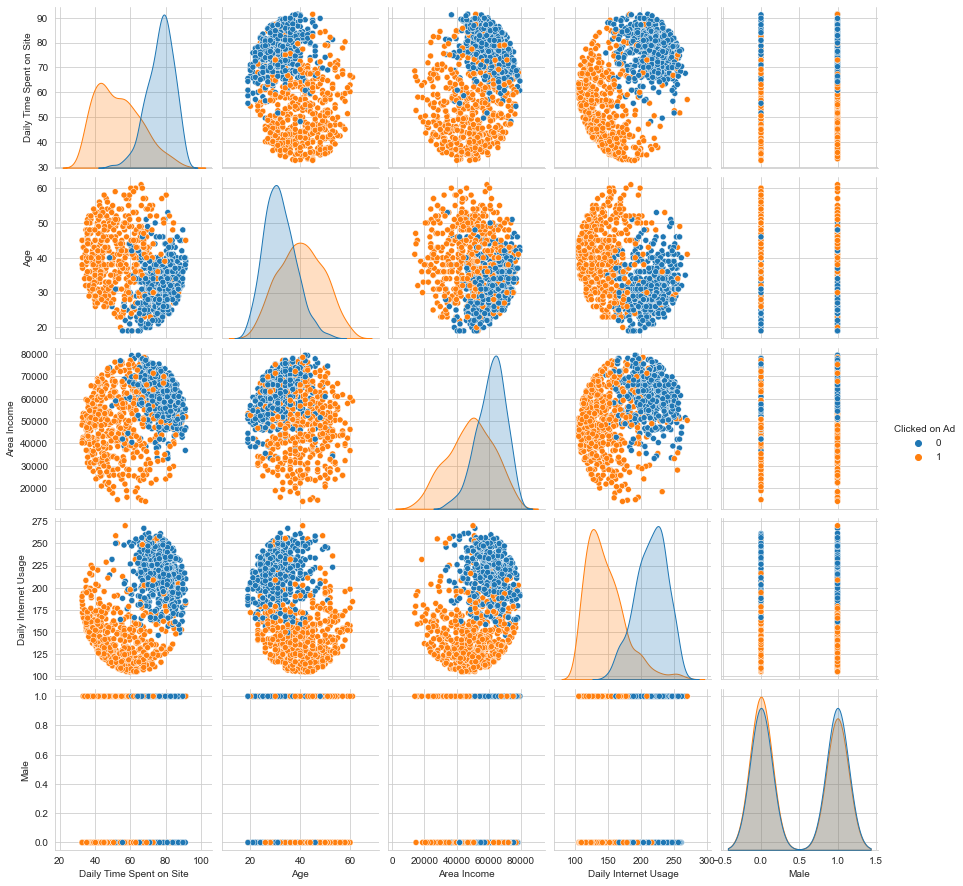

In [33]:
sns.pairplot(hue = 'Clicked on Ad', data = ad_data)

# Logistic Regression

Now it's time to do a train test split, and train the model.


** Split the data into training set and testing set using train_test_split**

In [68]:
from sklearn.model_selection import train_test_split

In [54]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'], axis = 1, inplace =True)

In [55]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad', axis =1), ad_data['Clicked on Ad'], test_size = 0.30 )

** Train and fit a logistic regression model on the training set.**

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

## Predictions and Evaluations
** Rredict values for the testing data.**

In [66]:
predictions

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

** Create a classification report for the model.**

In [62]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       148
           1       0.92      0.86      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## The end 